In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nielsen = pd.read_csv("aggregated_nielsen_2016.csv")

In [4]:
nielsen = nielsen[nielsen.product_group_descr == "MILK"]

In [5]:
new = nielsen.loc[nielsen.index.repeat(nielsen["nb_of_obs"])] \
    .reset_index(drop=True).drop("nb_of_obs", axis=1)

In [6]:
new = new[["store_state","purchase_month","upc_price"]]

In [7]:
df1 = new.groupby(["store_state","purchase_month"]).agg(["mean", "std", "count"]).reset_index()

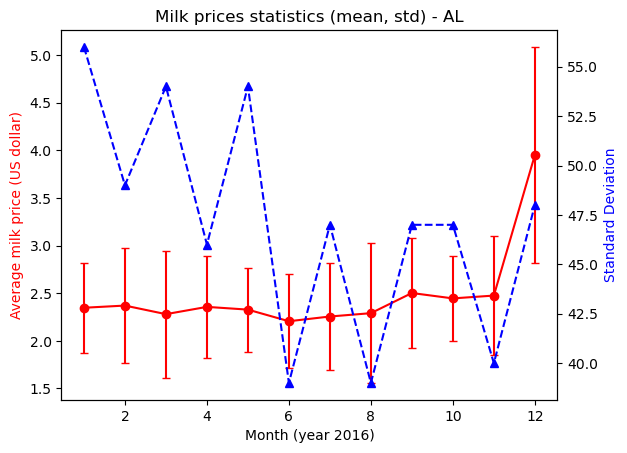

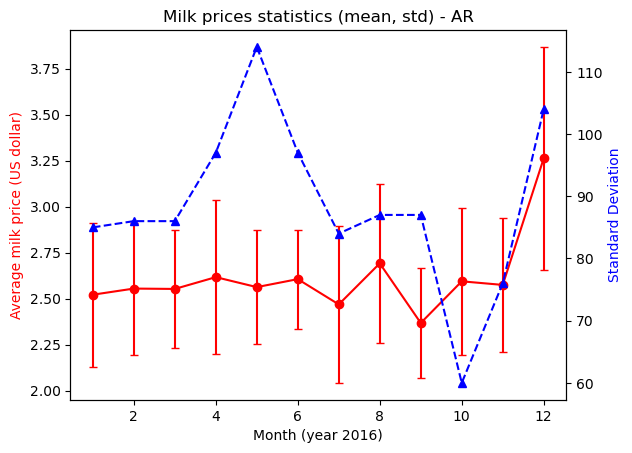

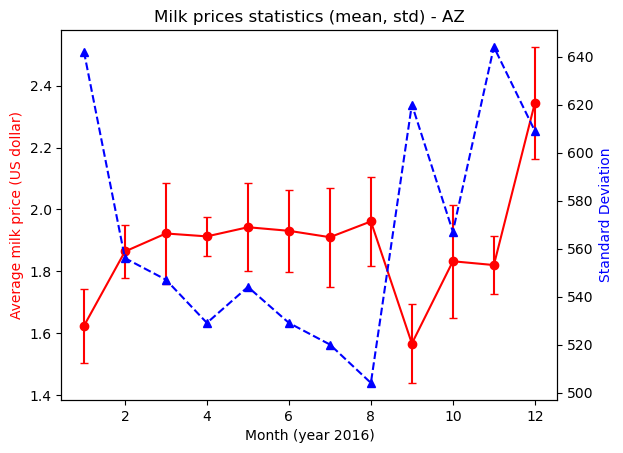

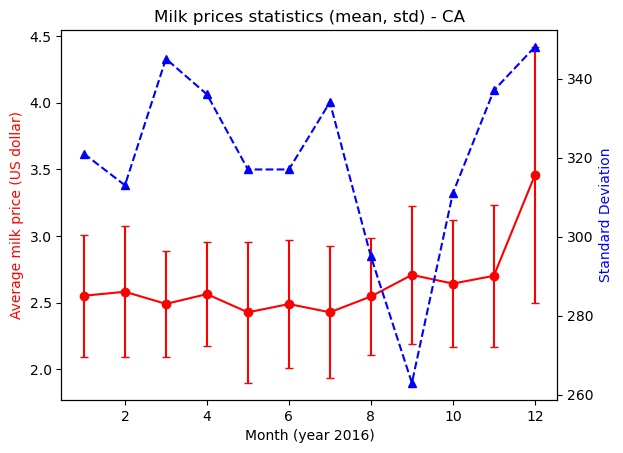

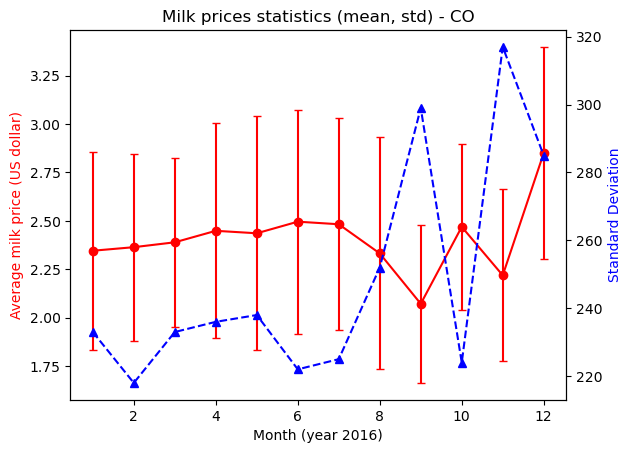

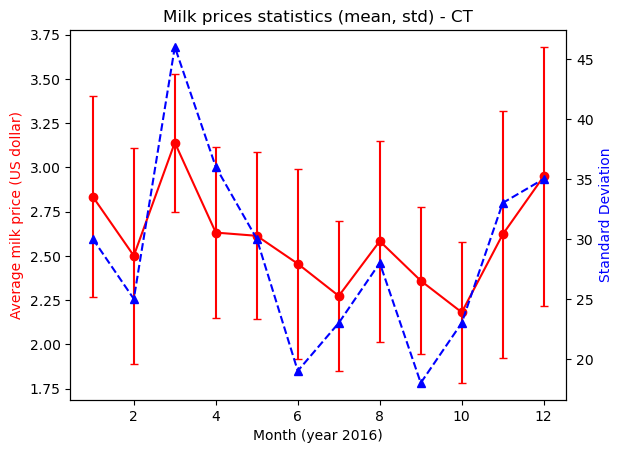

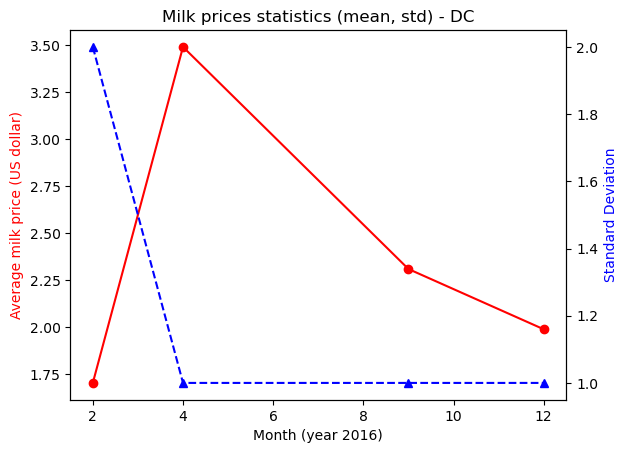

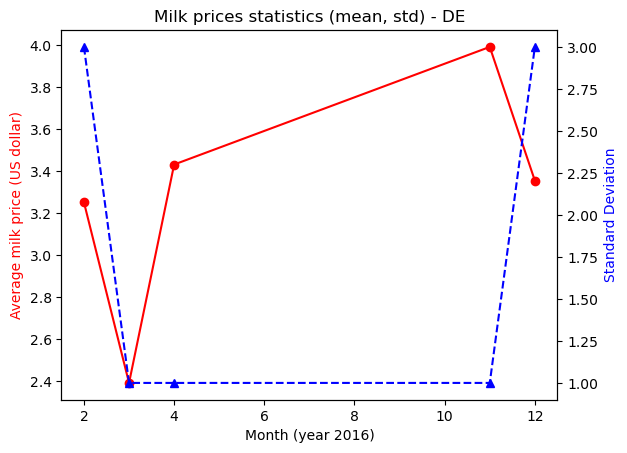

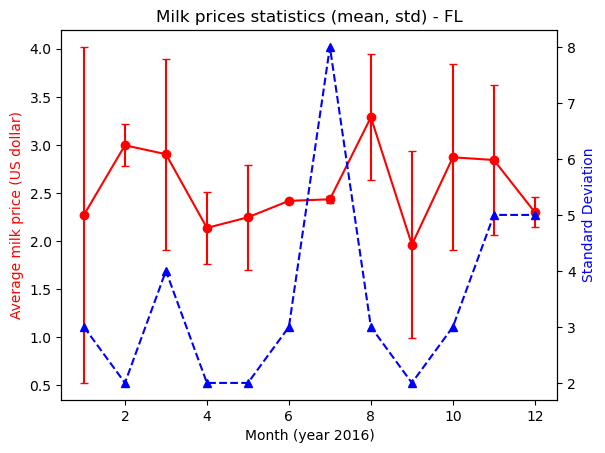

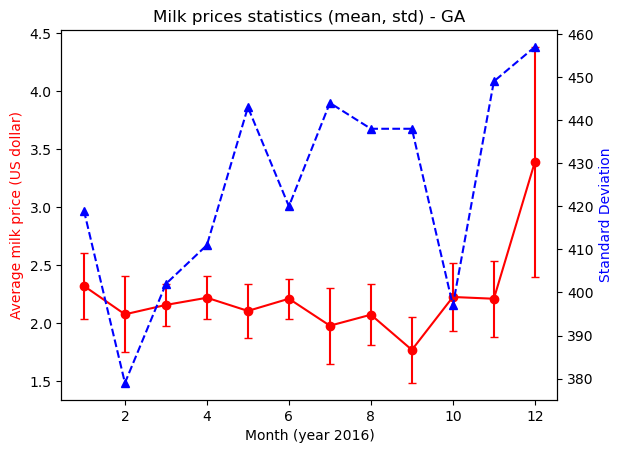

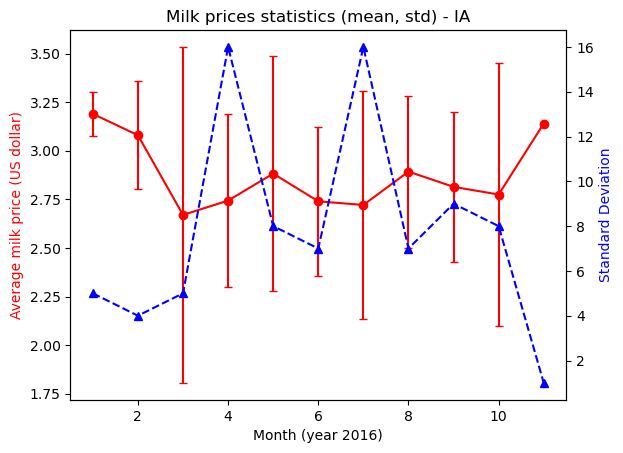

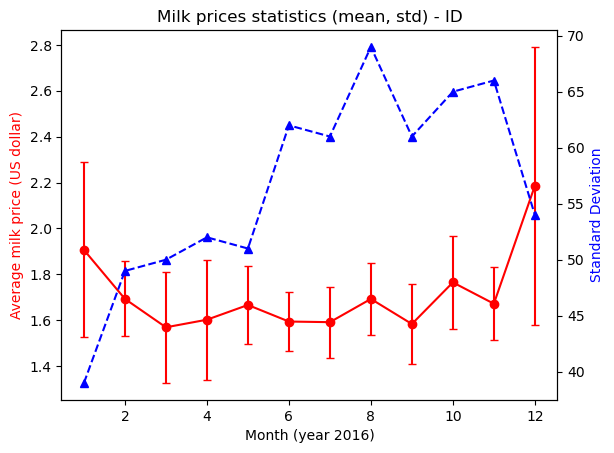

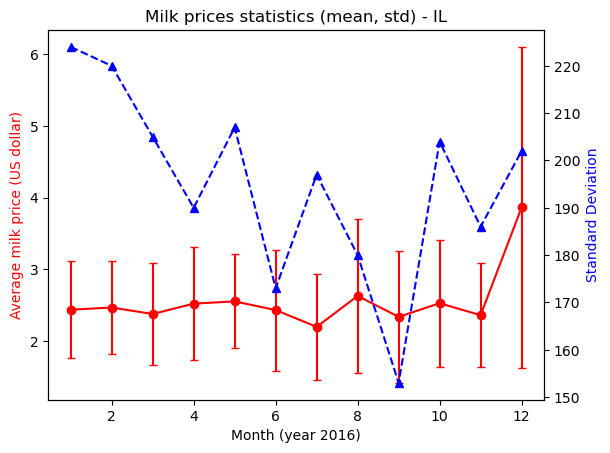

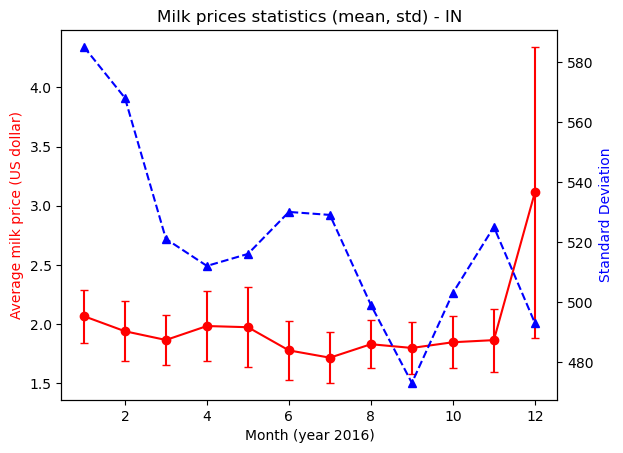

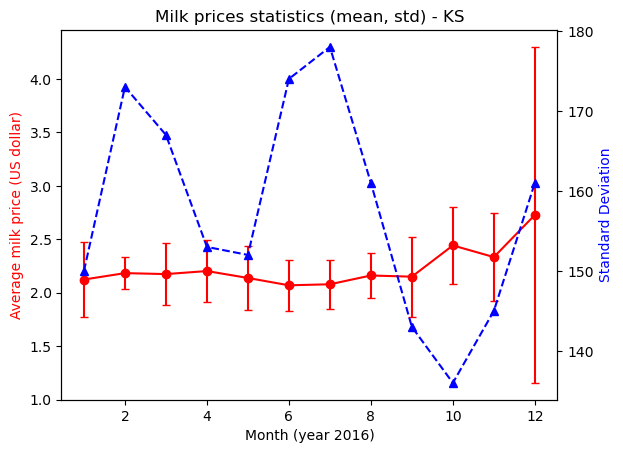

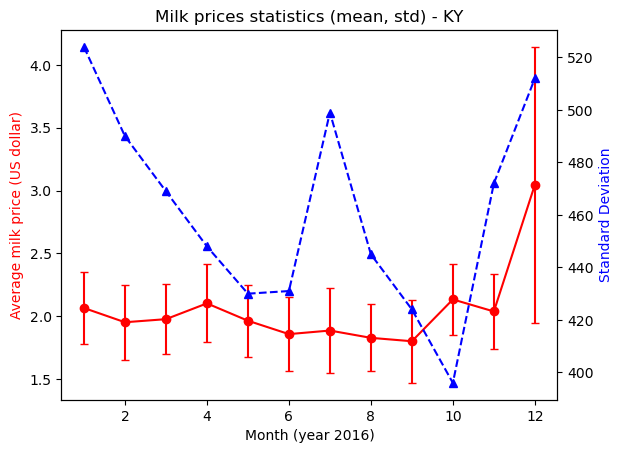

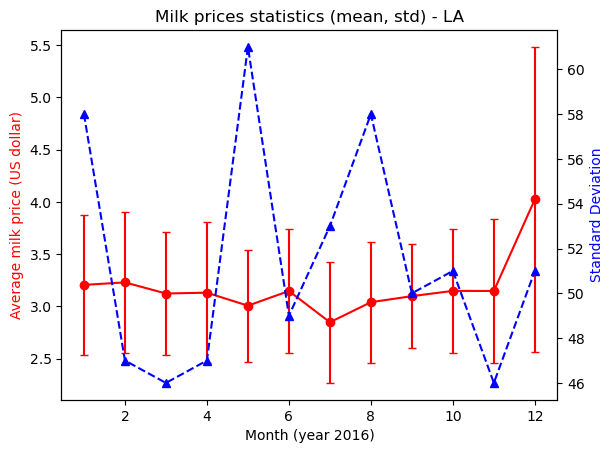

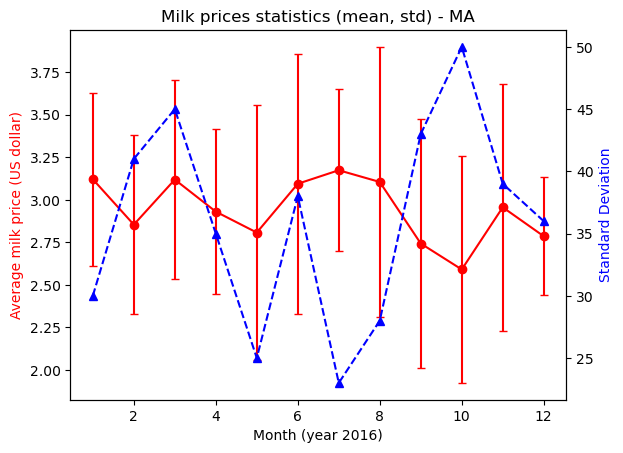

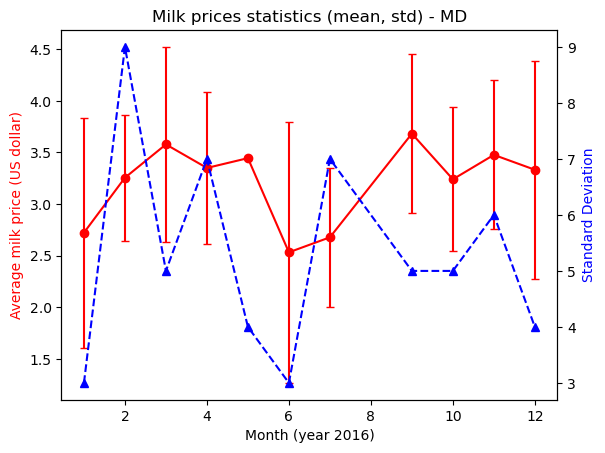

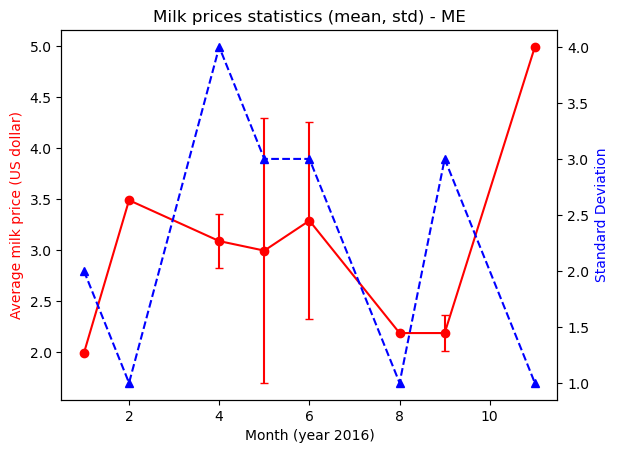

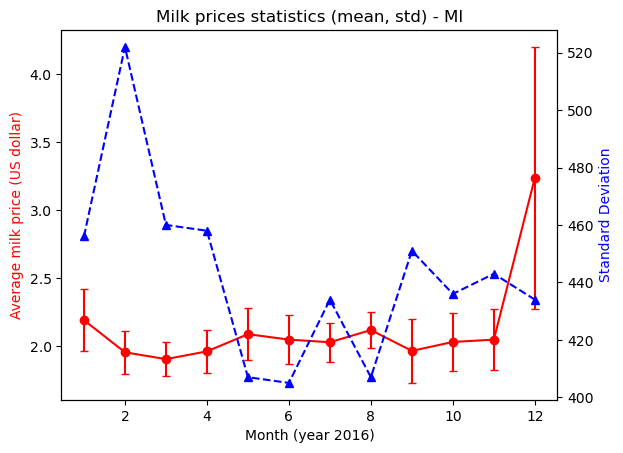

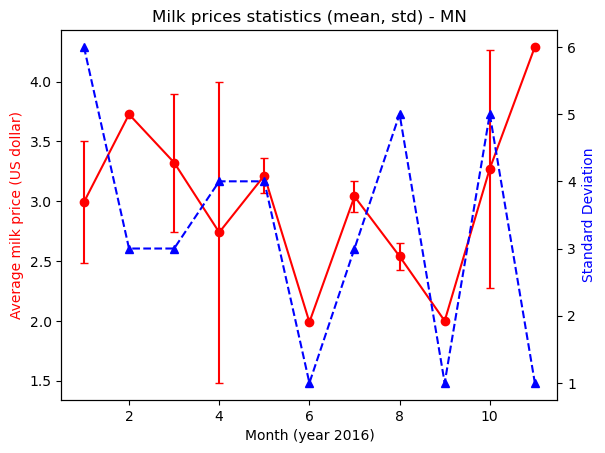

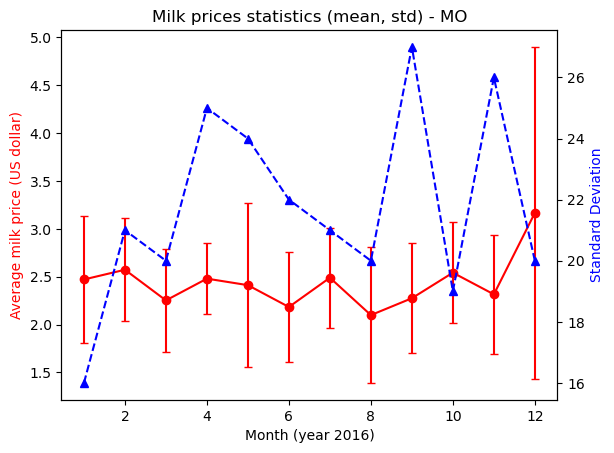

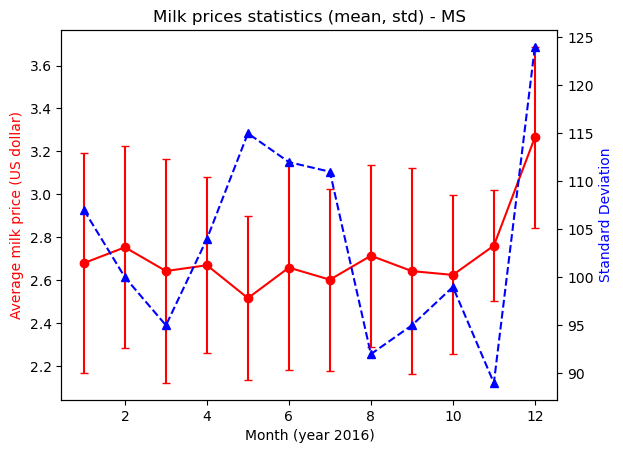

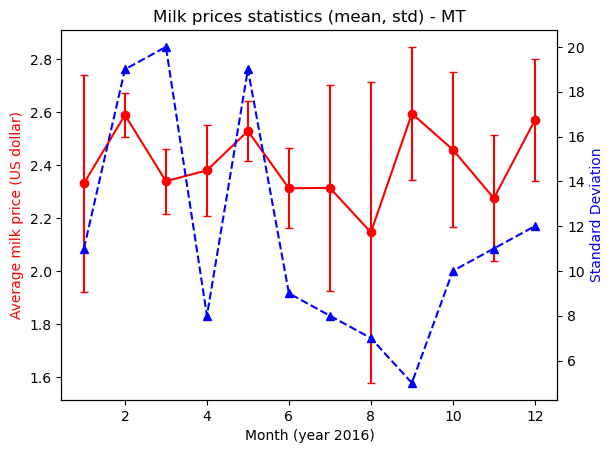

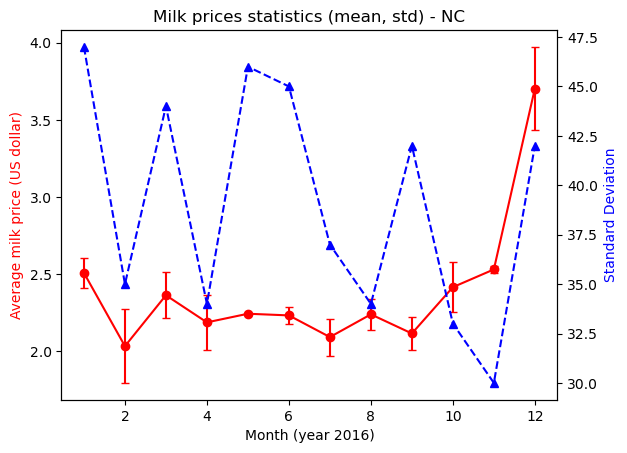

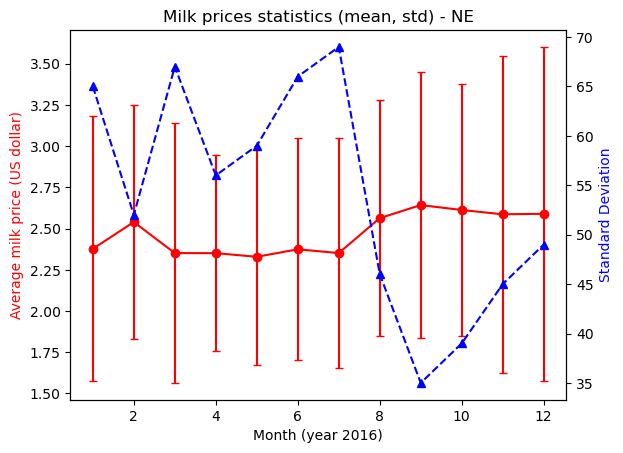

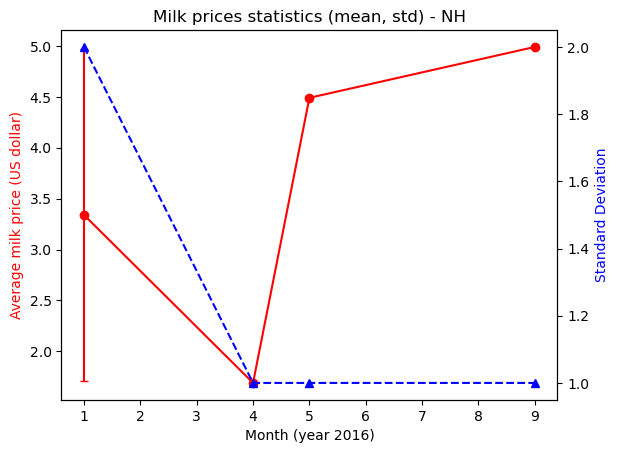

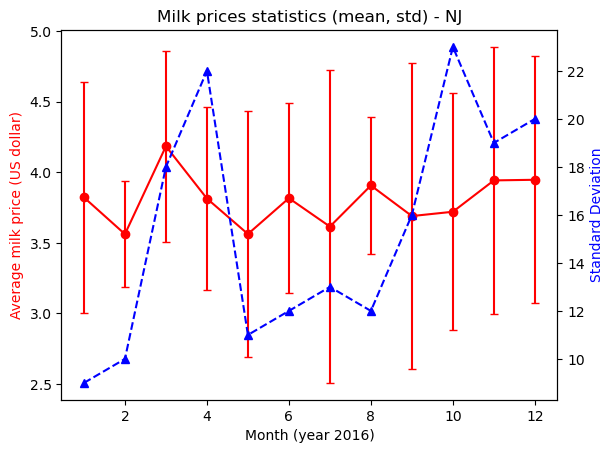

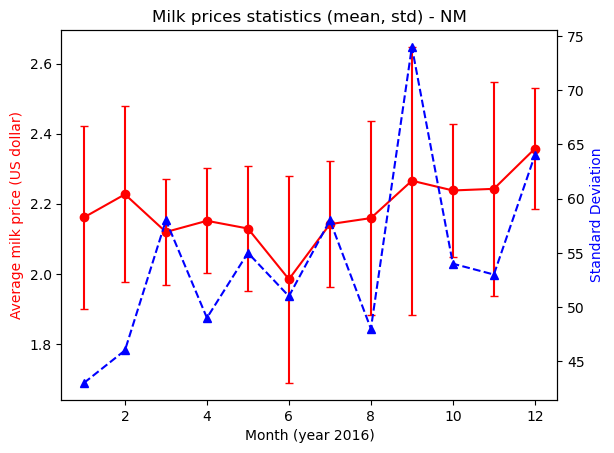

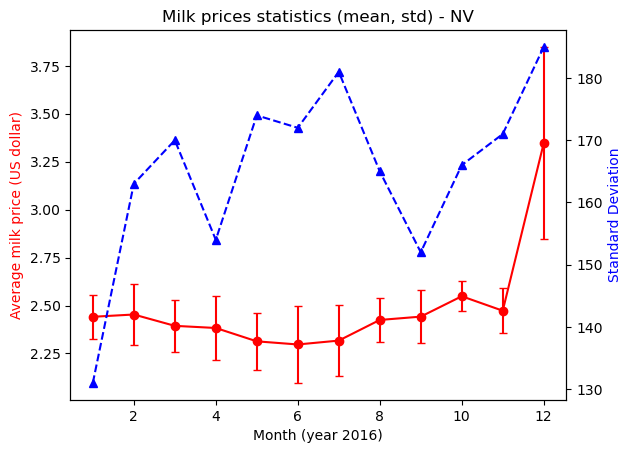

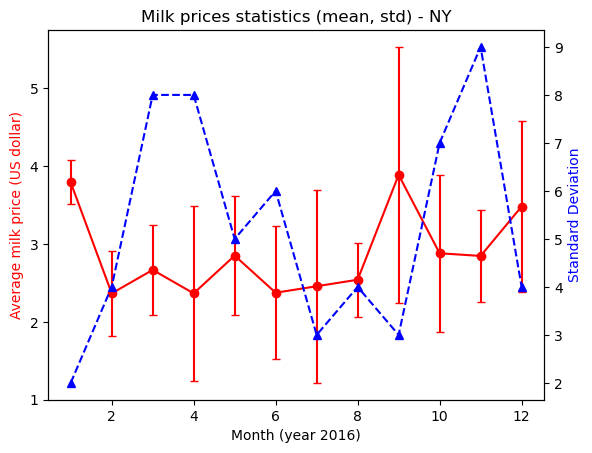

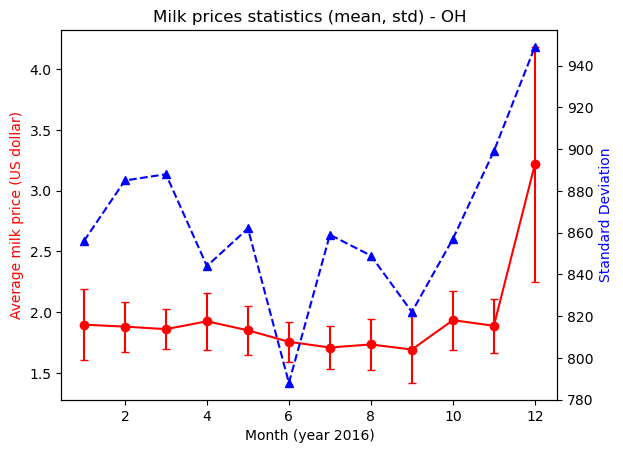

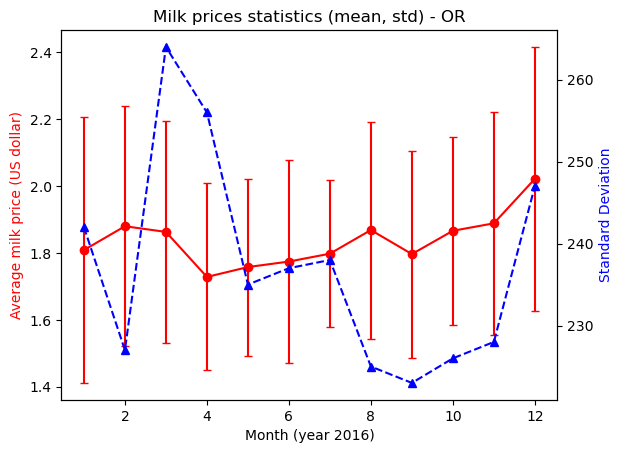

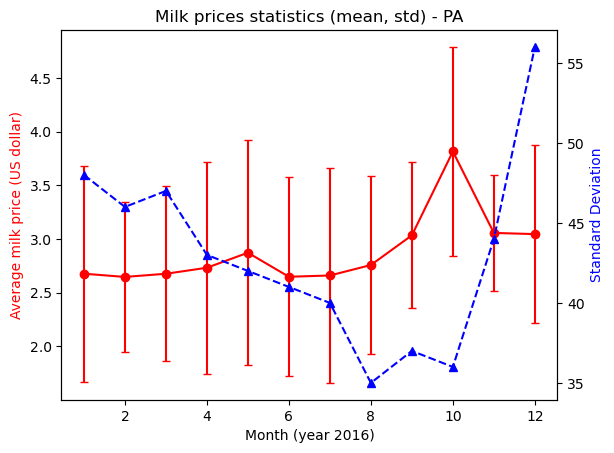

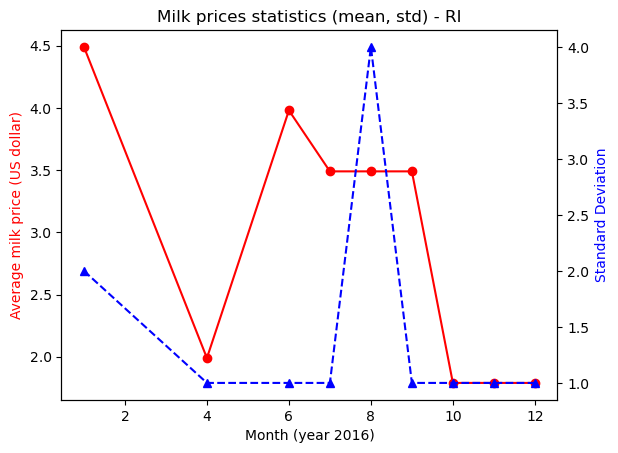

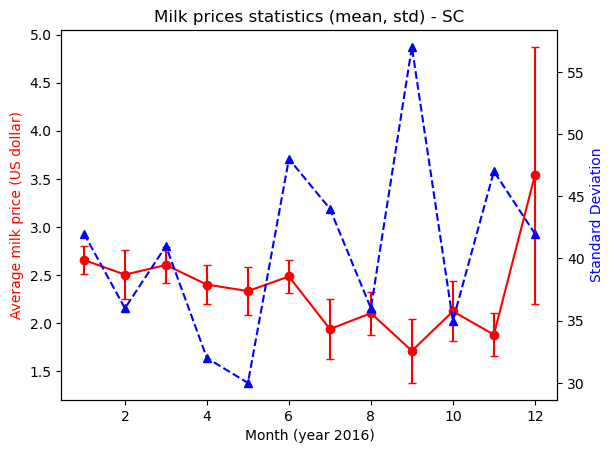

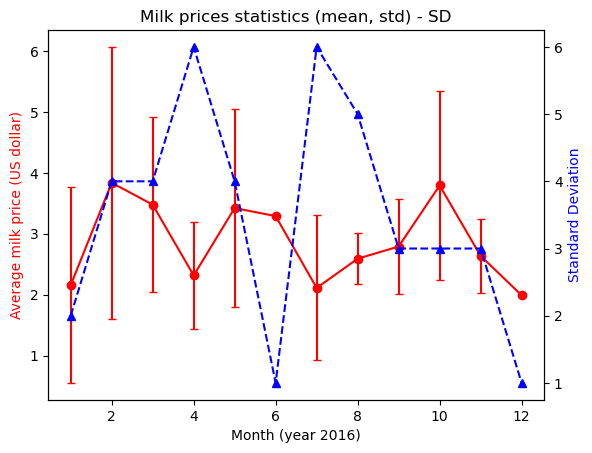

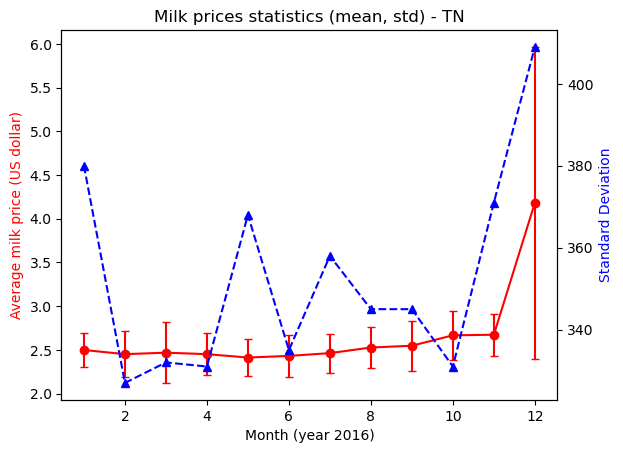

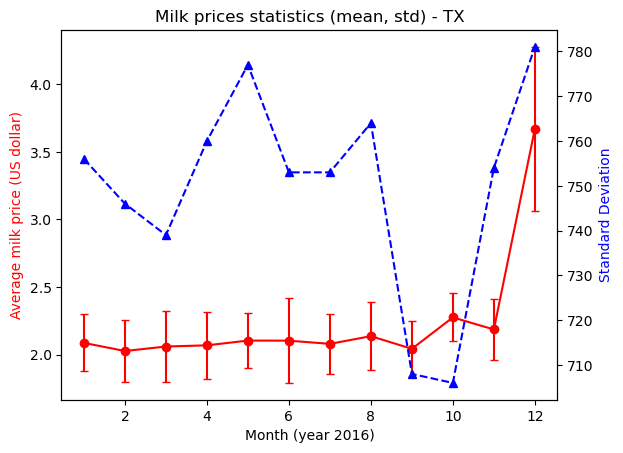

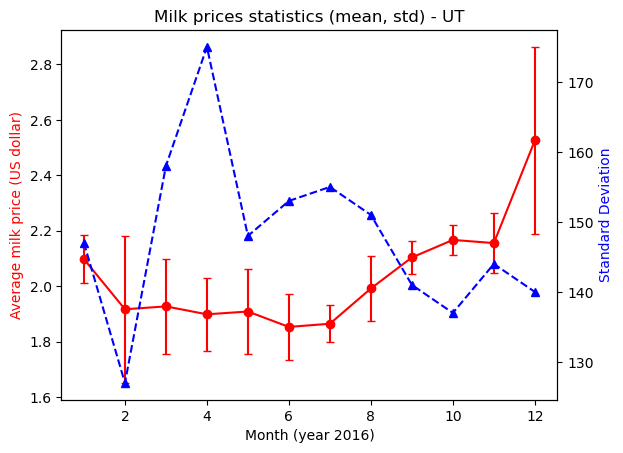

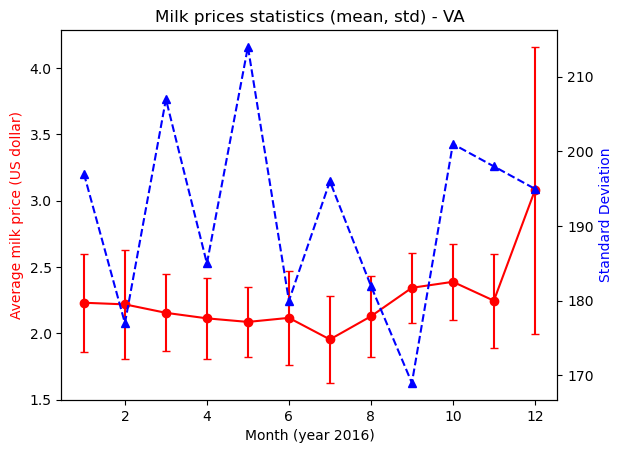

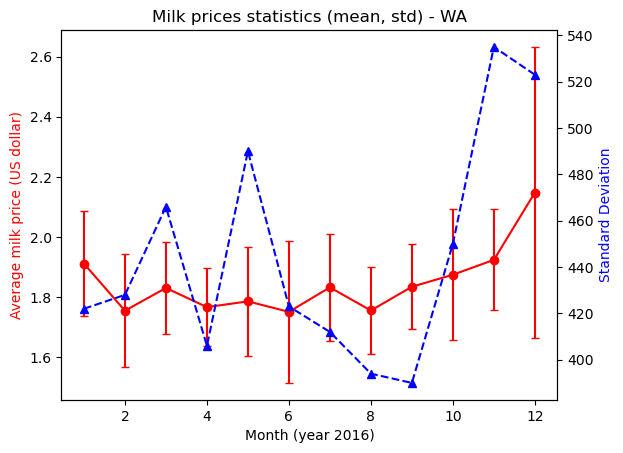

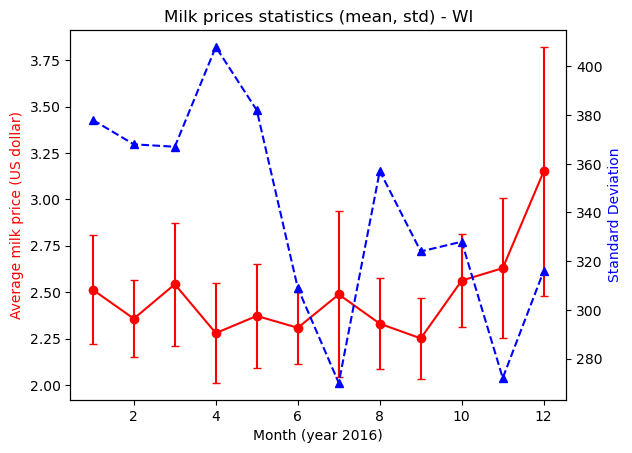

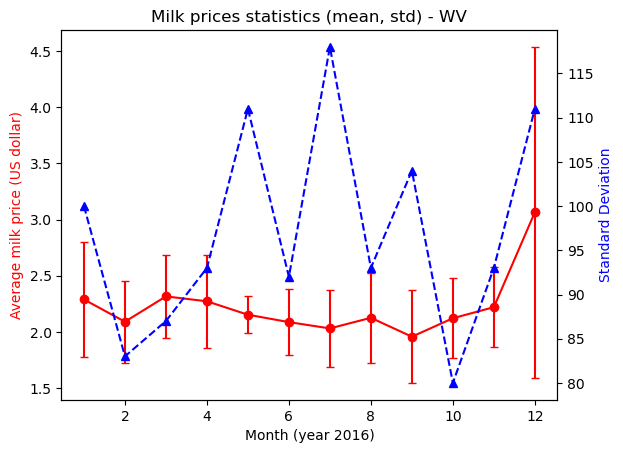

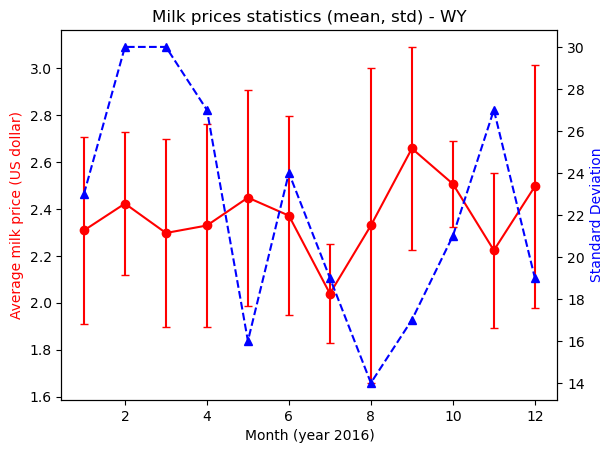

In [8]:
for state in df1["store_state"].unique():
    df2 = df1[df1.store_state == state]
    df3 = df2['purchase_month']
    df4 = df2[('upc_price', 'mean')]
    df5 = df2[('upc_price', 'std')]
    df6 = df2[('upc_price', 'count')]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.errorbar(df3, df4, df5, color='r', 
                 marker='o', linestyle='-', capsize = 3)
    ax2.plot(df3, df6, color='b', 
                 marker='^', linestyle = '--')
    ax1.set_xlabel("Month (year 2016)")
    ax1.set_ylabel("Average milk price (US dollar)", color='r')
    ax2.set_ylabel('Standard Deviation', color='b')
    plt.title(f"Milk prices statistics (mean, std) - {state}")
    plt.show()

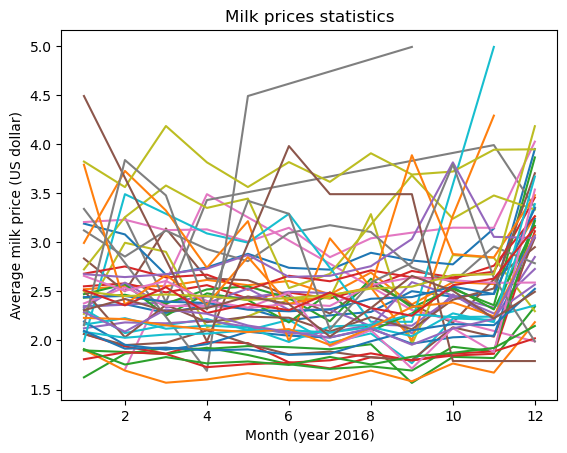

In [9]:
for state in df1["store_state"].unique():
    df2 = df1[df1.store_state == state]
    df4 = df2[('upc_price', 'mean')]
    df3 = df2['purchase_month']
    plt.plot(df3, df4, 
#             marker='o', 
             linestyle='-')
plt.xlabel("Month (year 2016)")
plt.ylabel("Average milk price (US dollar)")
plt.title("Milk prices statistics")
plt.show()